<a href="https://colab.research.google.com/github/Almee98/COVID-19-Positivity-Rate-Prediction/blob/main/COVID_19(data_competition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import folium
from folium import plugins
from itertools import cycle

from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.tree import plot_tree

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv("COVID_dataset_v0.csv")
df.head()

unitid  FIPS        county_name          city state    zip   latitude  \
0  106397  5143  Washington County  Fayetteville    AR  72701  36.070009   
1  106397  5143  Washington County  Fayetteville    AR  72701  36.070009   
2  106397  5143  Washington County  Fayetteville    AR  72701  36.070009   
3  106397  5143  Washington County  Fayetteville    AR  72701  36.070009   
4  106397  5143  Washington County  Fayetteville    AR  72701  36.070009   

   longitude       date  week  admission_rate  number_students  TotalCount  \
0 -94.176981  13sep2020  3156          0.7747            23121        4571   
1 -94.176981  20sep2020  3157          0.7747            23121        5766   
2 -94.176981  27sep2020  3158          0.7747            23121        6669   
3 -94.176981  04oct2020  3159          0.7747            23121        7796   
4 -94.176981  11oct2020  3160          0.7747            23121        8922   

   TotalCountWeekly  TotalConfirmedPositive  TotalConfirmedPositiveWeekly  \
0               874                     597                           124   
1              1195                     656                            59   
2               903                     676                            20   
3              1127                     697                            21   
4              1126                     713                            16   

   TotalPositivityRate  TotalPositivityRateWeekly  
0            13.060599                  14.187643  
1            11.377038                   4.937238  
2            10.136452                   2.214839  
3             8.940482                   1.863354  
4             7.991482                   1.420959

In [ ]:
df.shape

(1130, 18)

# **Shape of the Data:**
- The dataset comprises of 1130 observations and 18 characteristics.
- Out of which, one is dependent variable and rest 17 are independent variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   unitid                        1130 non-null   int64  
 1   FIPS                          1130 non-null   int64  
 2   county_name                   1130 non-null   object 
 3   city                          1130 non-null   object 
 4   state                         1130 non-null   object 
 5   zip                           1130 non-null   object 
 6   latitude                      1130 non-null   float64
 7   longitude                     1130 non-null   float64
 8   date                          1130 non-null   object 
 9   week                          1130 non-null   int64  
 10  admission_rate                1130 non-null   float64
 11  number_students               1130 non-null   int64  
 12  TotalCount                    1130 non-null   int64  
 13  Tot

# **Data Info:**
- Data has values of type float, integer, string.
- No variable column has null/missing values.

In [ ]:
df.describe()

unitid          FIPS     latitude    longitude         week  \
count    1130.000000   1130.000000  1130.000000  1130.000000  1130.000000   
mean   182157.344248  30157.324779    39.326055   -84.021281  3160.638053   
std     36815.520544  14215.467107     4.025146    11.909187     2.823563   
min    106397.000000   5143.000000    25.721260  -122.260463  3156.000000   
25%    155025.000000  18141.000000    37.269489   -88.766428  3158.000000   
50%    182670.000000  29510.000000    40.039388   -80.549728  3161.000000   
75%    213543.000000  42027.000000    42.050356   -75.305207  3163.000000   
max    243780.000000  55079.000000    47.921654   -70.203333  3165.000000   

       admission_rate  number_students     TotalCount  TotalCountWeekly  \
count     1130.000000      1130.000000    1130.000000       1130.000000   
mean         0.482847     14015.532743   34808.481416       4341.392920   
std          0.257576     11236.392030   67725.163161       7737.110434   
min          0.043600       892.000000      16.000000          6.000000   
25%          0.228300      5131.000000    5022.000000        479.250000   
50%          0.519700     10261.000000   14858.500000       1777.500000   
75%          0.683000     20592.000000   37947.000000       4701.250000   
max          1.000000     53194.000000  815205.000000      64239.000000   

       TotalConfirmedPositive  TotalConfirmedPositiveWeekly  \
count             1130.000000                   1130.000000   
mean               462.594690                     42.861947   
std                766.233117                     80.255728   
min                  0.000000                      0.000000   
25%                 36.000000                      4.000000   
50%                150.000000                     14.000000   
75%                540.000000                     46.000000   
max               5028.000000                    864.000000   

       TotalPositivityRate  TotalPositivityRateWeekly  
count          1130.000000                1130.000000  
mean              3.204417                   2.875628  
std               5.290384                   4.870667  
min               0.000000                   0.000000  
25%               0.283600                   0.159566  
50%               1.151237                   1.098318  
75%               3.963434                   3.398934  
max              49.919485                  46.428571

# **Data description:**
- It can be observed that there is a significant difference between the minimum value and the first quadrant (represented by 25%), and the 3rd quadrant (represented by 75%) and the maximum value, suggesting that there are extreme values (or **outliers**) in the dataset.

- We can also observe that mean > median for number_students, TotalCount, TotalCountWeekly, TotaConfirmedPositive, TotalConfirmedPositiveWeekly, TotalPositivityRate and TotalPositivityRateWeekly, and the opposite for admission_rate.

<ipython-input-6-3bb8eb8d7494>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="viridis_r", square = True, annot = True)


<Axes: >

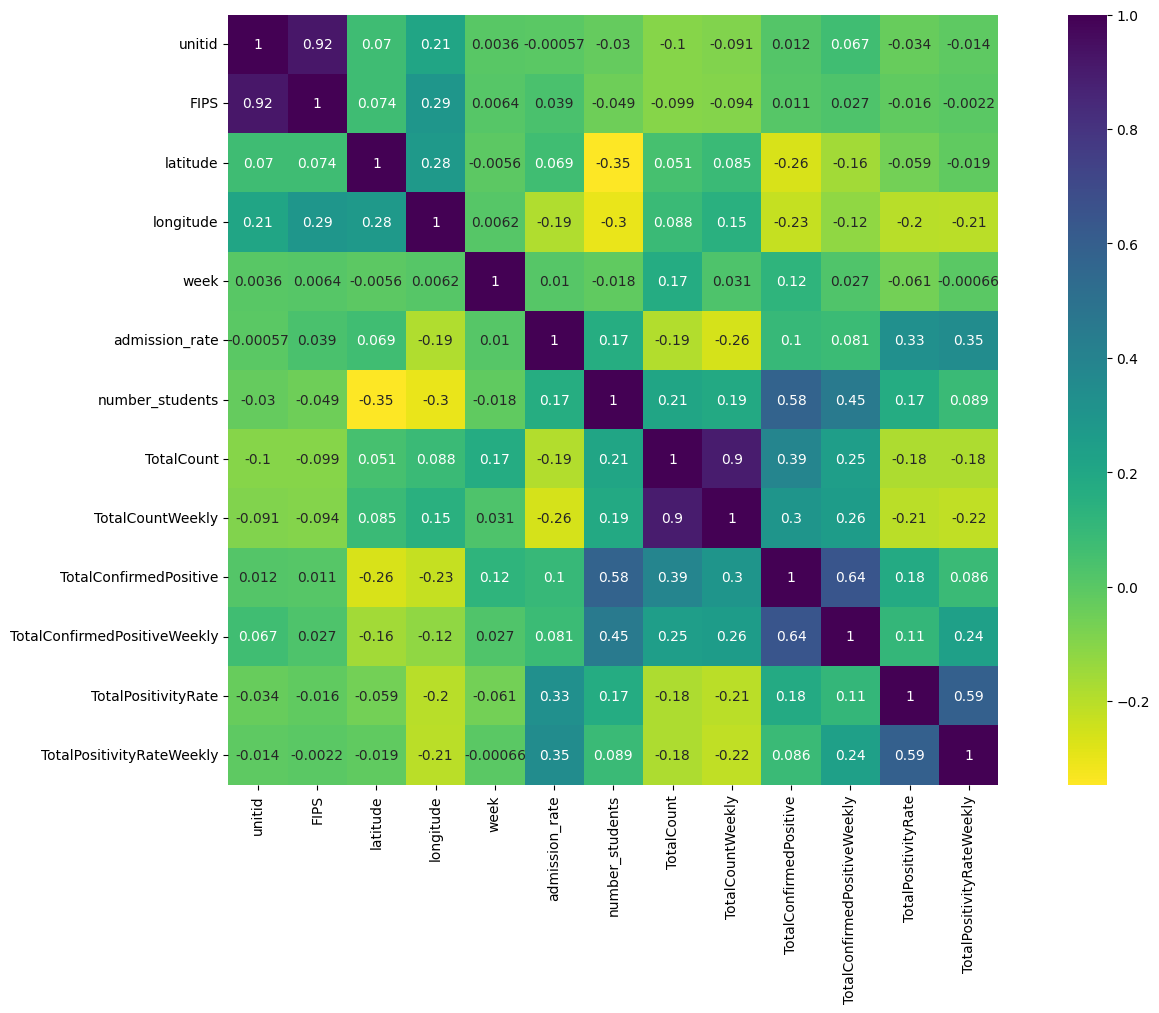

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df.corr(), cmap="viridis_r", square = True, annot = True)

# **Heatmap observations:**
- Here we can infer that TotalConfirmedPositive has a strong positive correlation with number_students and a strong negative correlation with latitude
- We can alse see that none of the fields correlate with latitude as much as they do with other fields.

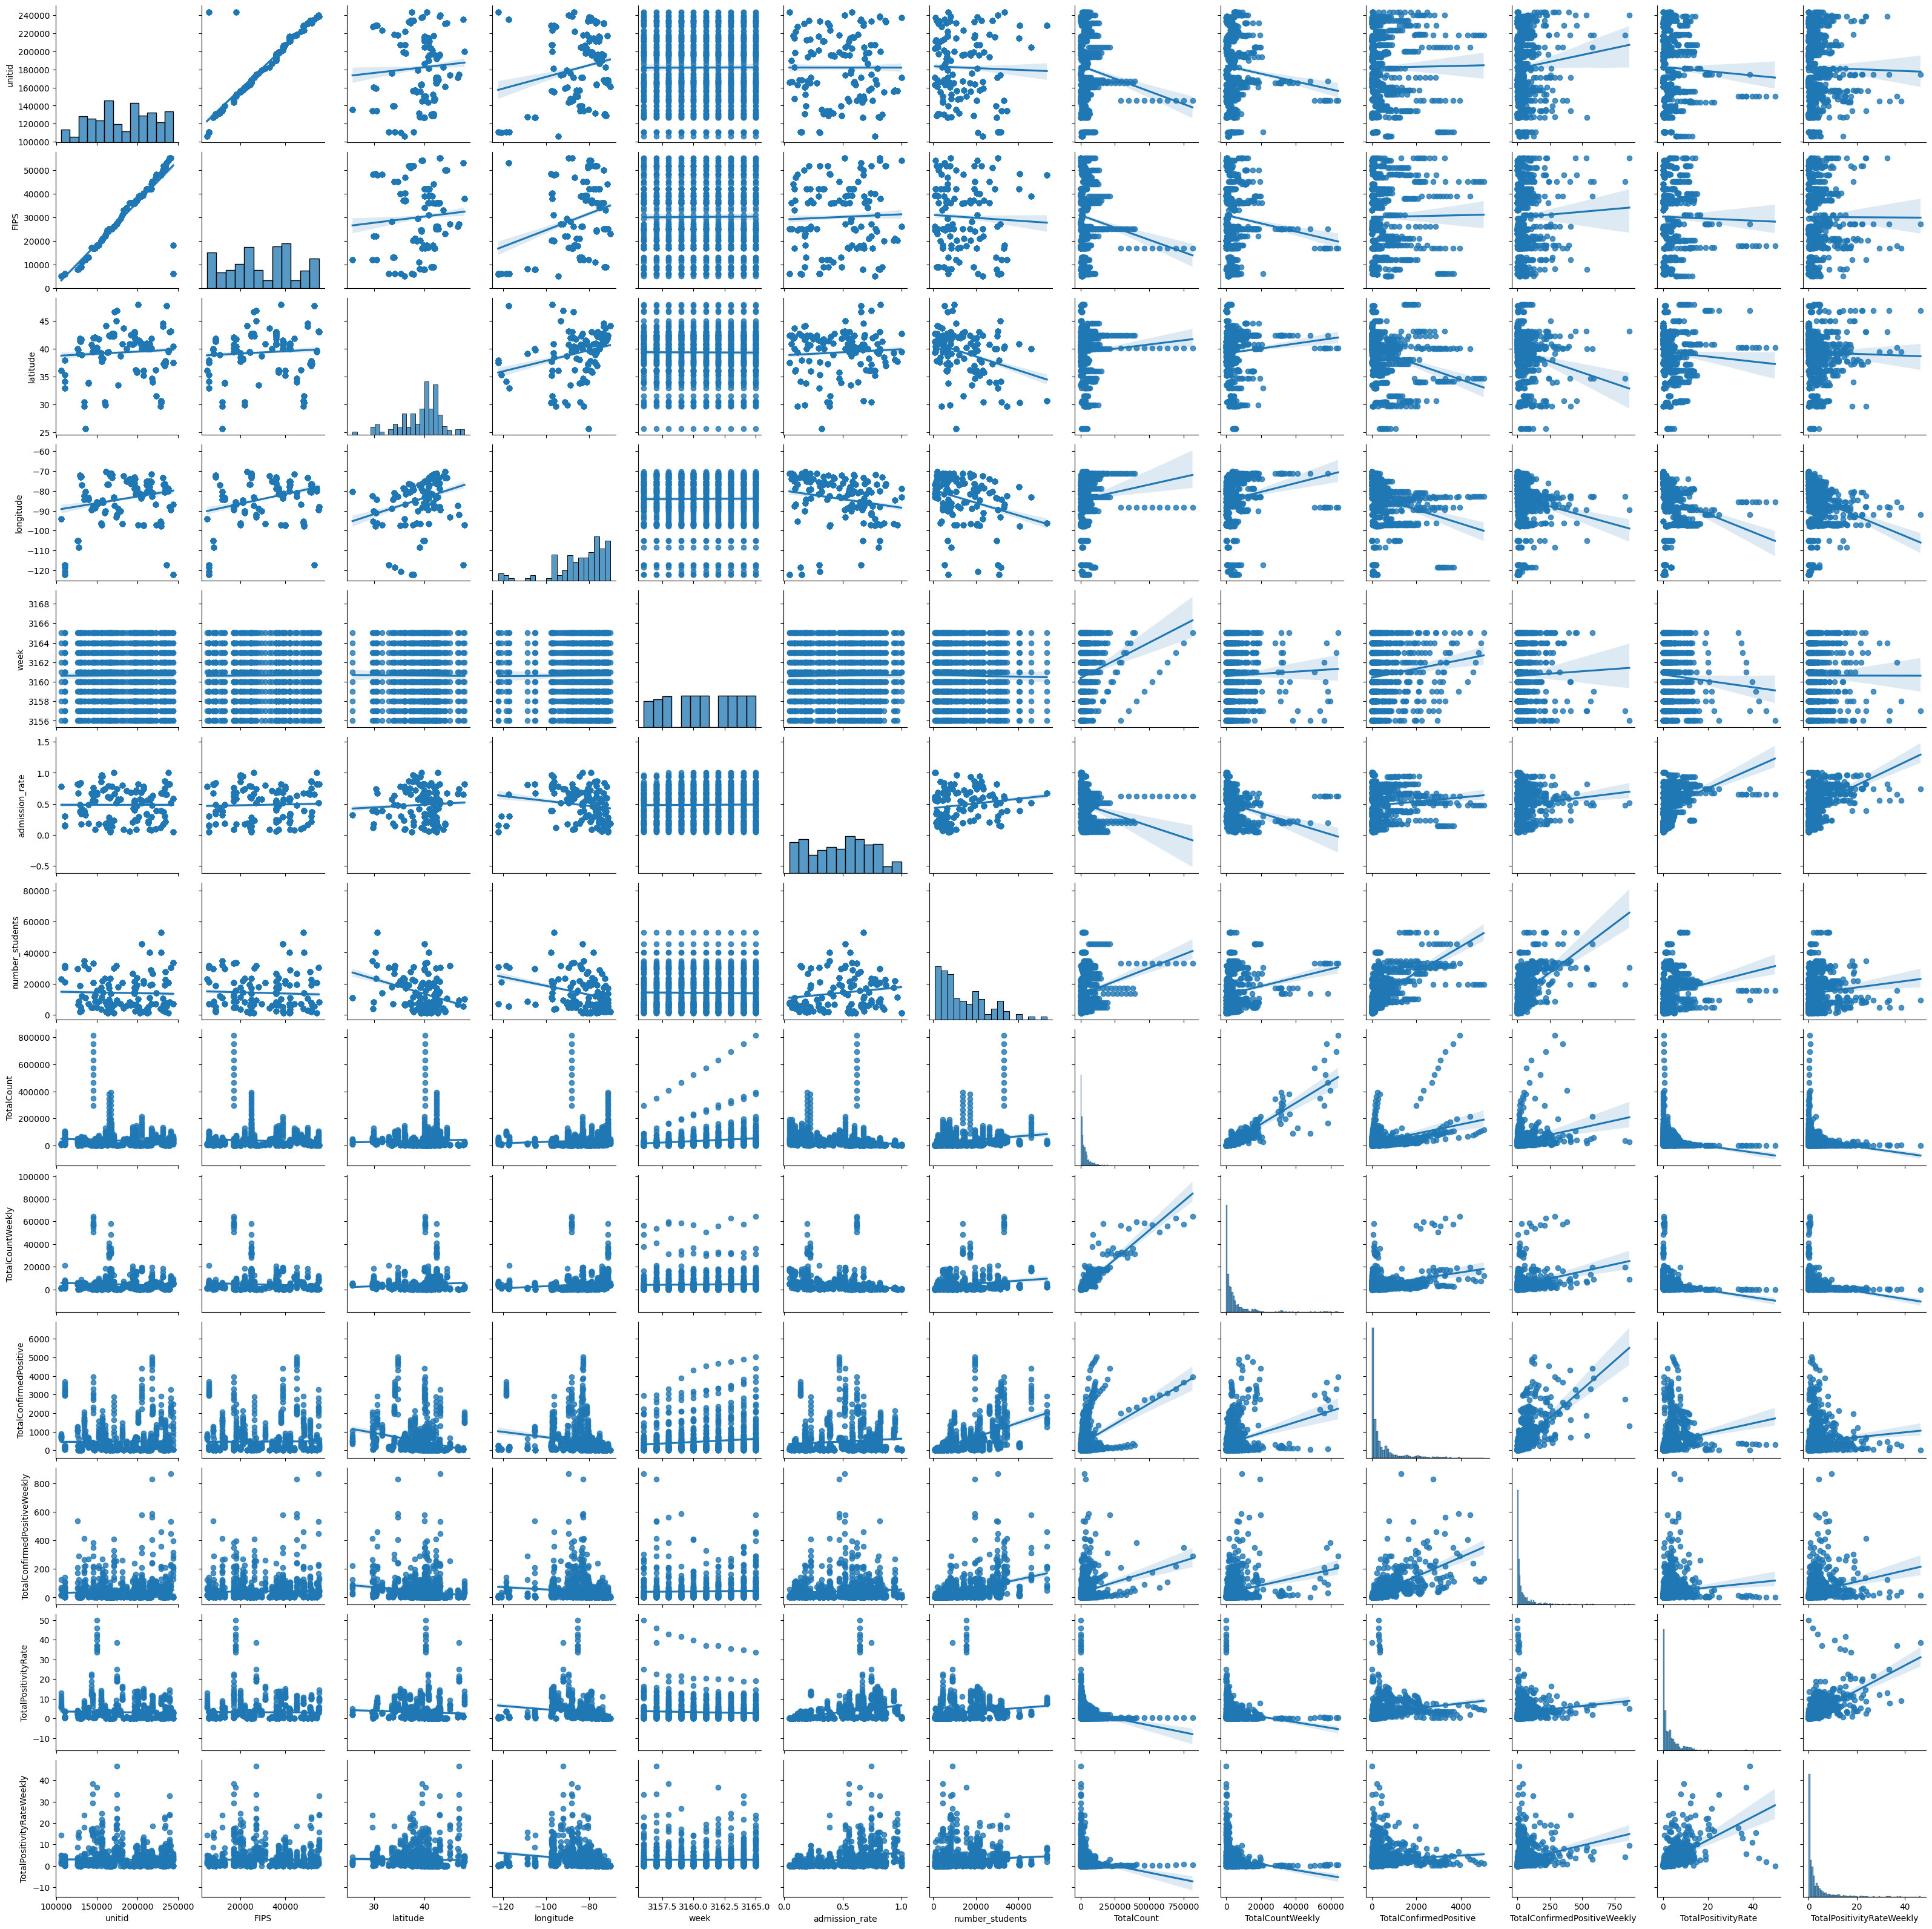

In [ ]:
# Create a scatter plot with regression lines
sns.pairplot(df, kind='reg')
plt.show()

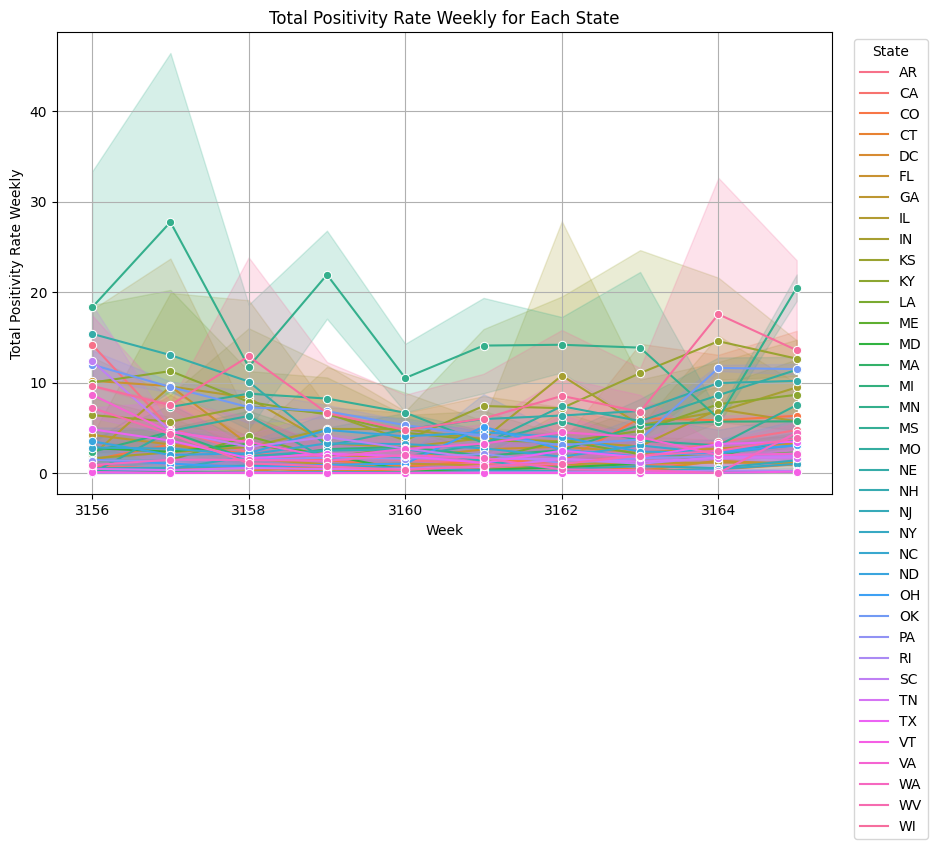

In [ ]:
# Plot a line plot showing TotalPositivityRateWeekly per week for each state
plt.figure(figsize=(10, 6))
sns.lineplot(x='week', y='TotalPositivityRateWeekly', hue='state', data=df, marker='o')
plt.xlabel('Week')
plt.ylabel('Total Positivity Rate Weekly')
plt.title('Total Positivity Rate Weekly for Each State')
plt.legend(title='State', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)
plt.show()

<ipython-input-9-d9c91e5109b9>:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


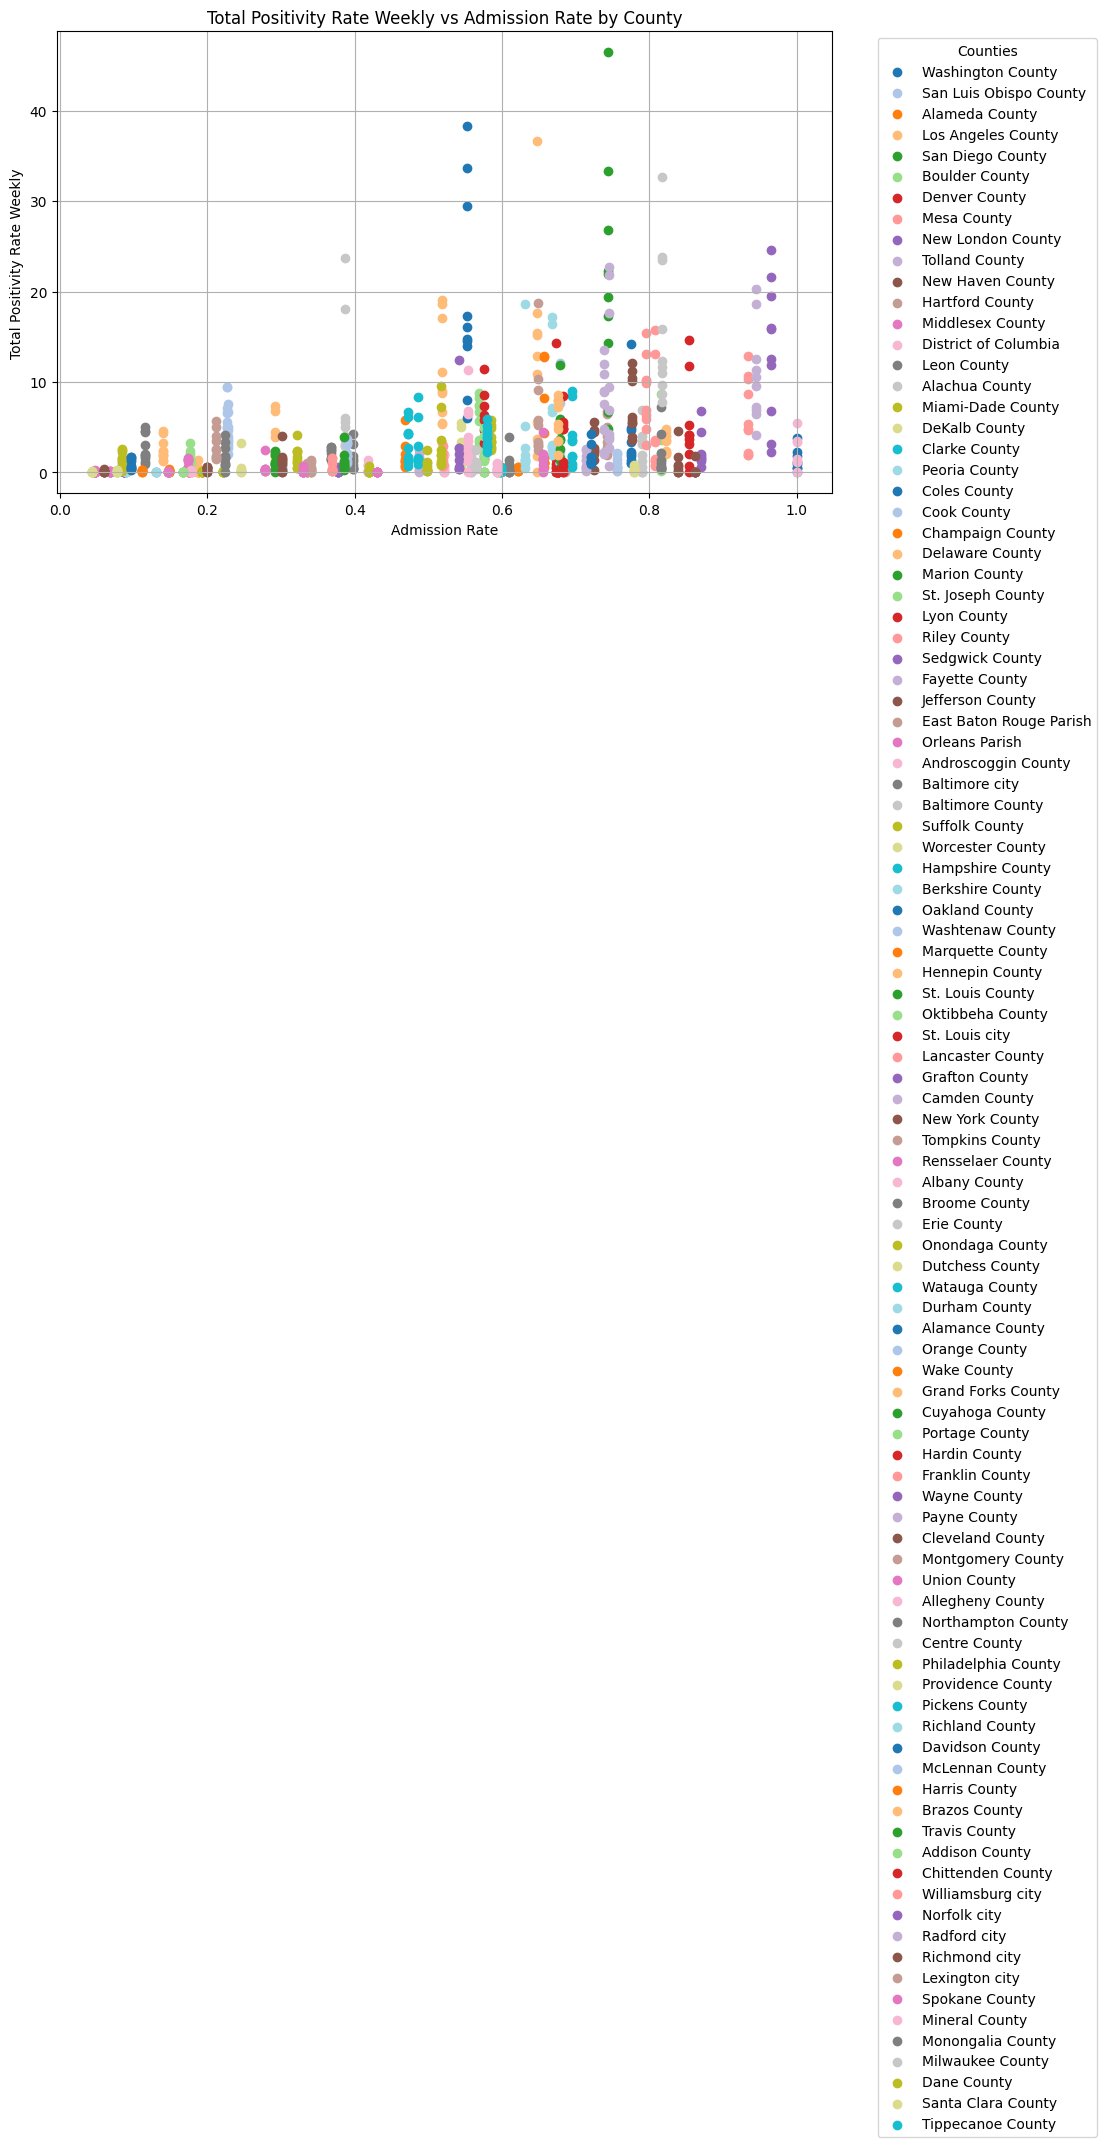

In [ ]:
# Plot a scatter plot with admission rate on the x-axis and average TotalPositivityRateWeekly on the y-axis
# Get unique counties and assign a color to each county
unique_counties = df['county_name'].unique()
colors = cycle(plt.cm.tab20.colors)  # You can use any colormap you prefer

# Create a scatter plot with different colors for each county
plt.figure(figsize=(10, 6))
for county in unique_counties:
    county_data = df[df['county_name'] == county]
    color = next(colors)
    plt.scatter(x='admission_rate', y='TotalPositivityRateWeekly', data=county_data, marker='o', label=county, color=color)

plt.xlabel('Admission Rate')
plt.ylabel('Total Positivity Rate Weekly')
plt.title('Total Positivity Rate Weekly vs Admission Rate by County')
plt.grid(True)

# Create a separate legend outside the plot
plt.legend(title='Counties', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<Axes: xlabel='admission_rate', ylabel='TotalPositivityRate'>

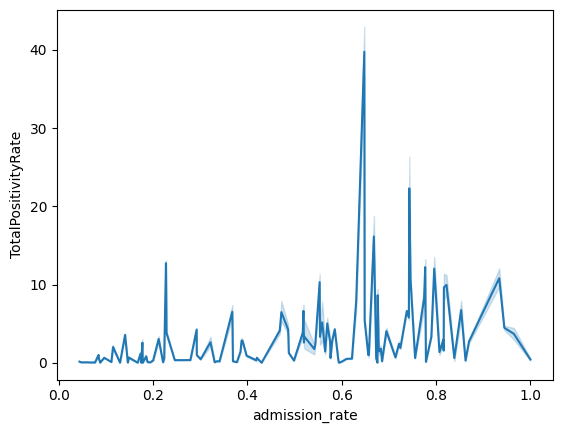

In [ ]:
sns.lineplot(data=df, x='admission_rate', y='TotalPositivityRate')

<Axes: xlabel='TotalCountWeekly', ylabel='TotalPositivityRate'>

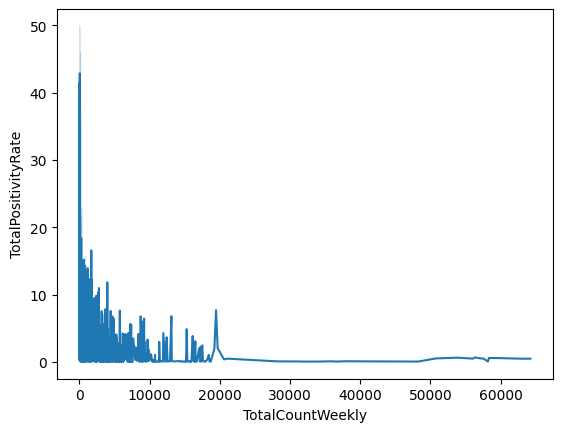

In [ ]:
sns.lineplot(data=df, x='TotalCountWeekly', y='TotalPositivityRate')

<Axes: xlabel='number_students', ylabel='TotalPositivityRate'>

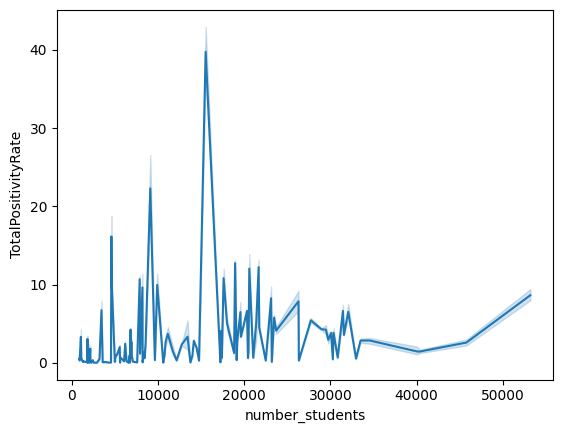

In [ ]:
sns.lineplot(data=df, x='number_students', y='TotalPositivityRate')

<Axes: xlabel='FIPS', ylabel='TotalPositivityRate'>

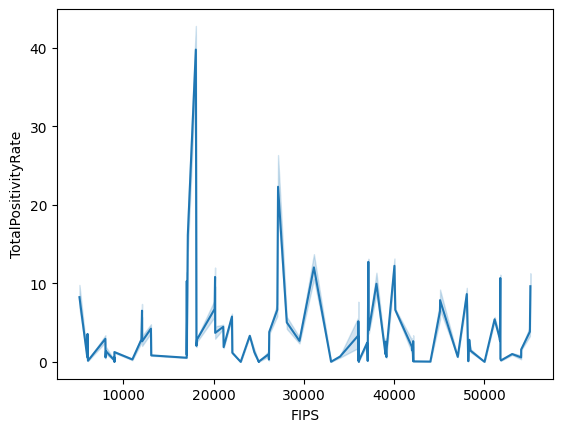

In [ ]:
sns.lineplot(data=df, x='FIPS', y='TotalPositivityRate')

<Axes: xlabel='FIPS', ylabel='TotalPositivityRate'>

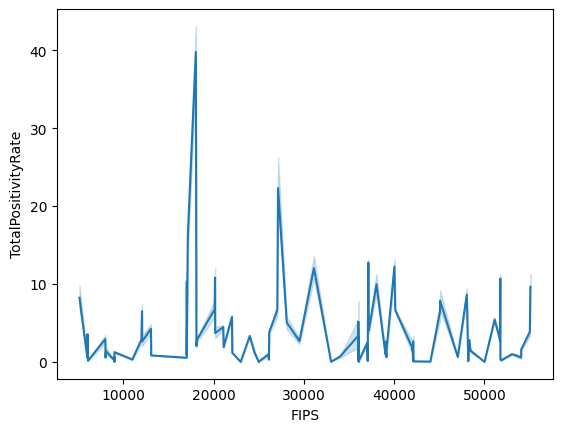

In [ ]:
sns.lineplot(data=df, x='FIPS', y='TotalPositivityRate')

<Axes: xlabel='admission_rate'>

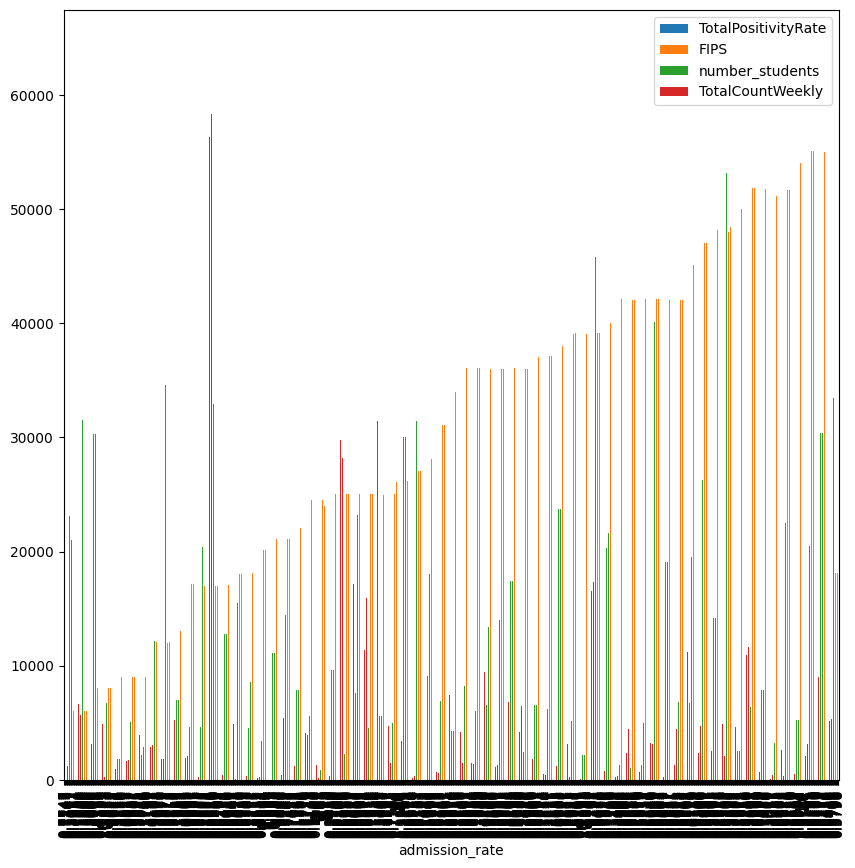

In [ ]:
df.plot(x = "admission_rate", y=["TotalPositivityRate", "FIPS", "number_students", "TotalCountWeekly"],
        kind="bar", figsize=(10, 10))

In [ ]:
# Create a map centered around the mean latitude and longitude
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Add a title to the map using folium.Html
title_html = '''
<h3 align="center" style="font-size:20px"><b>Total Confirmed Positive Cases Map</b></h3>
'''
m.get_root().html.add_child(folium.Element(title_html))

# Add markers for each data point
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['TotalConfirmedPositive'] / 50,  # Adjust the marker size based on the case count
        color='blue',
        fill=True,
        fill_color='lightblue',
        fill_opacity=0.6,
        popup=f"TotalConfirmedPositive: {row['TotalConfirmedPositive']}"
    ).add_to(m)

# Display the map
m

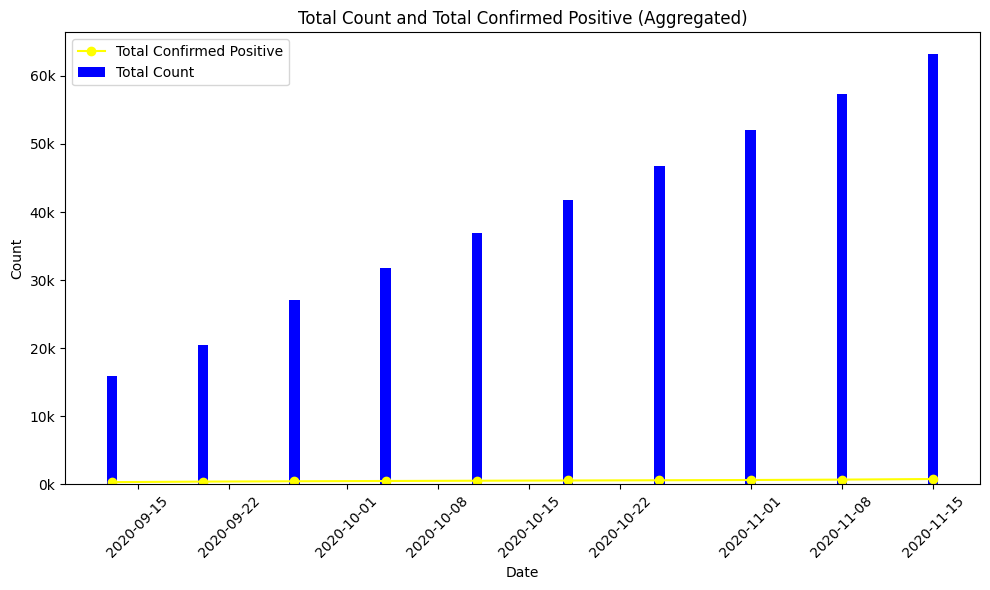

In [ ]:
from matplotlib.ticker import FuncFormatter

df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime

# Group the data by date and aggregate the values
aggregated_df = df.groupby('date').agg({'TotalCount': 'sum', 'TotalConfirmedPositive': 'sum'}).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot TotalCount as a bar plot
ax.bar(aggregated_df['date'], aggregated_df['TotalCount'], color='blue', label='Total Count')

# Plot TotalConfirmedPositive as a line plot
ax.plot(aggregated_df['date'], aggregated_df['TotalConfirmedPositive'], color='yellow', marker='o', label='Total Confirmed Positive')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Total Count and Total Confirmed Positive (Aggregated)')

# Set y-axis tick labels in 10s of thousands
def format_ticks(x, pos):
    return f'{x/100000:.0f}k'

ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))

# Show the legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# **Observations:**
Here we can observe that the total count increases steadily with time, whereas the total confirmed positive cases remain stagnant throughout the weeks at around 1k.

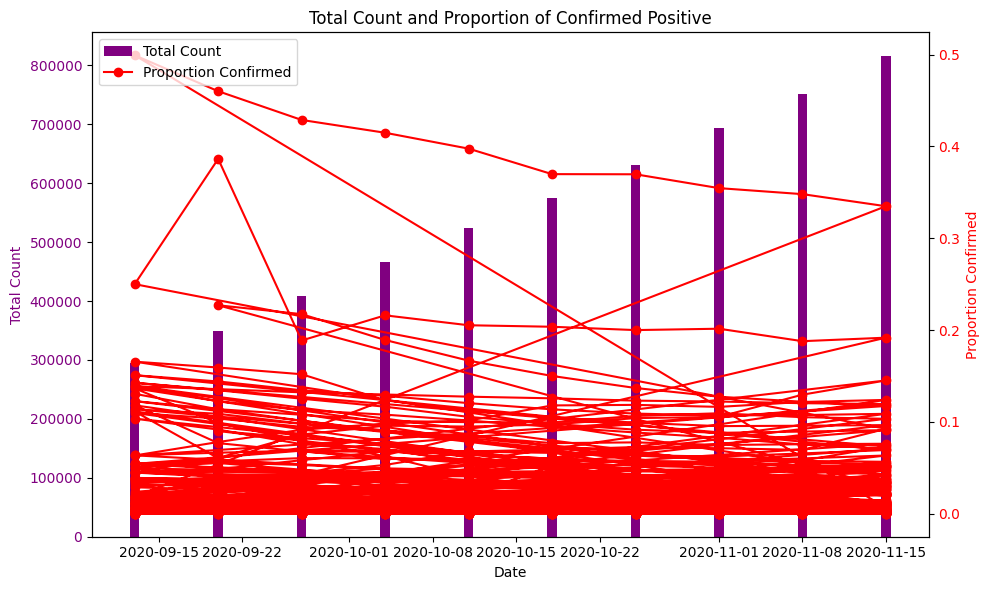

In [ ]:
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime

# Calculate the proportion of TotalConfirmedPositive out of TotalCount
df['ProportionConfirmed'] = df['TotalConfirmedPositive'] / df['TotalCount']

# Create subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot TotalCount as a bar plot on the primary y-axis
ax1.bar(df['date'], df['TotalCount'], color='purple', label='Total Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Count', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.set_title('Total Count and Proportion of Confirmed Positive')

# Create a secondary y-axis for the ProportionConfirmed line plot
ax2 = ax1.twinx()
ax2.plot(df['date'], df['ProportionConfirmed'], color='red', marker='o', label='Proportion Confirmed')
ax2.set_ylabel('Proportion Confirmed', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine the legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

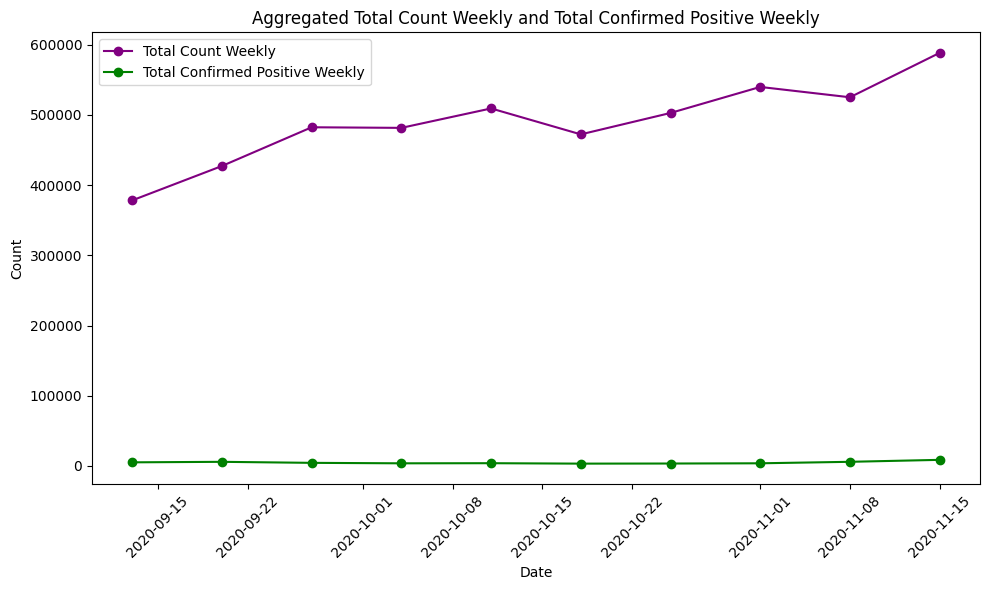

In [ ]:
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime

# Group the data by date and aggregate the values
aggregated_df = df.groupby('date').agg({'TotalCountWeekly': 'sum', 'TotalConfirmedPositiveWeekly': 'sum'}).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot TotalCountWeekly against TotalConfirmedPositiveWeekly
ax.plot(aggregated_df['date'], aggregated_df['TotalCountWeekly'], color='purple', marker='o', label='Total Count Weekly')
ax.plot(aggregated_df['date'], aggregated_df['TotalConfirmedPositiveWeekly'], color='green', marker='o', label='Total Confirmed Positive Weekly')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Aggregated Total Count Weekly and Total Confirmed Positive Weekly')

# Show the legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# **Observations:**

Again, it can be observed that while the "Total Count Weekly" is going up throughout the weeks, the number of total confirmed positive cases weekly remain constant.

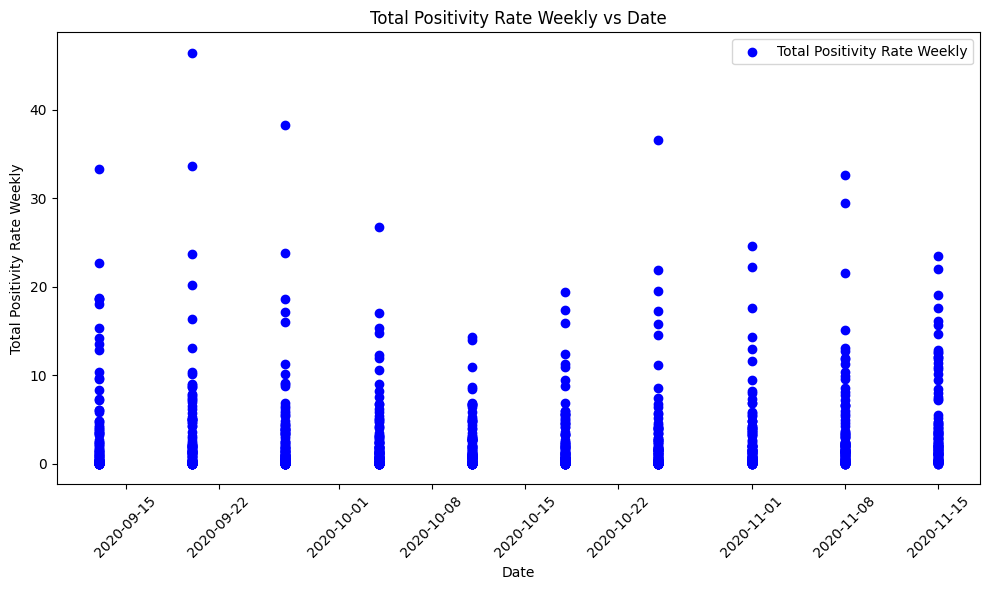

In [ ]:
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot TotalPositivityRateWeekly against date as a scatter plot
ax.scatter(df['date'], df['TotalPositivityRateWeekly'], color='blue', marker='o', label='Total Positivity Rate Weekly')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Total Positivity Rate Weekly')
ax.set_title('Total Positivity Rate Weekly vs Date')

# Show the legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# **Observations:**

The above graph shows total positivity rate weekly against each week. These positivity rates vary by area.

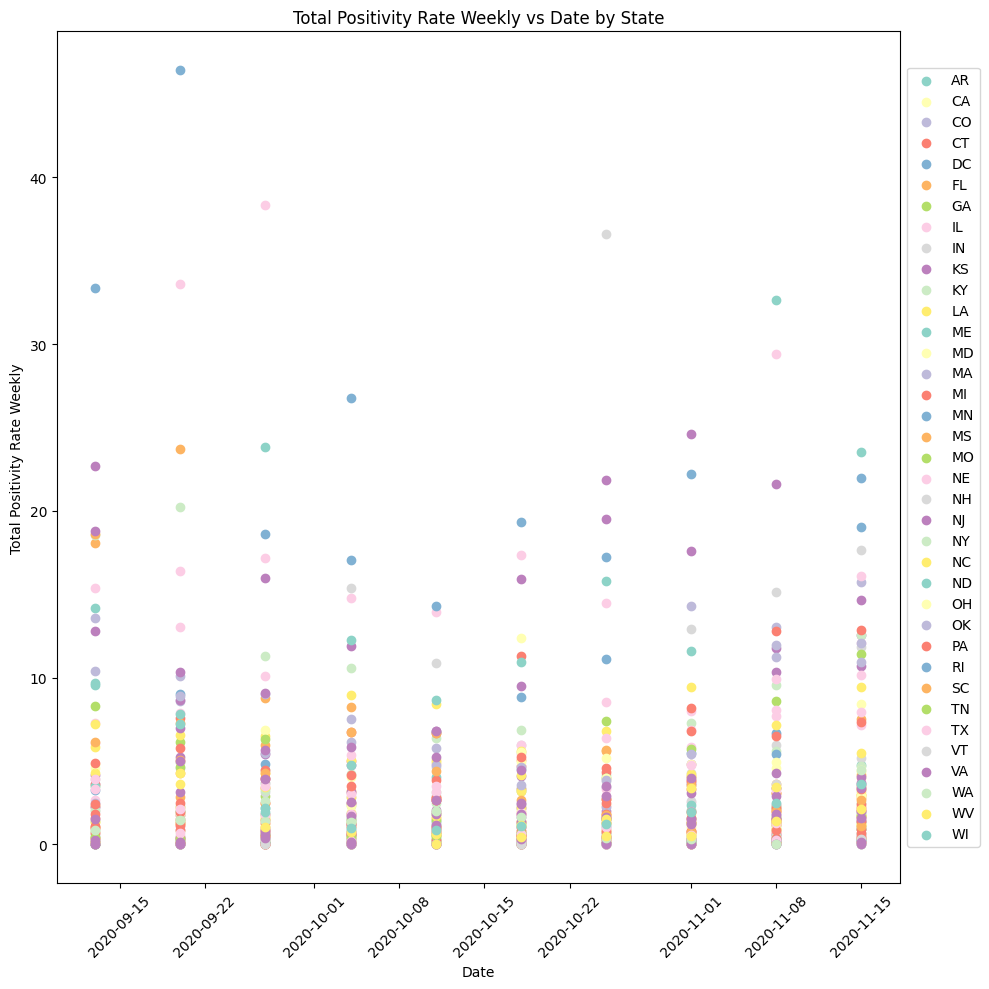

In [ ]:
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime

# Create a figure and axis
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Use Seaborn color palette to automatically generate colors
state_palette = sns.color_palette("Set3", n_colors=len(df['state'].unique()))

# Plot TotalPositivityRateWeekly against date as a scatter plot
for i, state in enumerate(df['state'].unique()):
    state_data = df[df['state'] == state]
    ax.scatter(state_data['date'], state_data['TotalPositivityRateWeekly'], color=state_palette[i], marker='o', label=state)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Total Positivity Rate Weekly')
ax.set_title('Total Positivity Rate Weekly vs Date by State')

# Place the legend on the side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# **Observations:**
- Here, we can see the total positivity rate weekly, throughout the weeks, in different states.
- It can be observed that most of the states have a weekly positivity rate between 0 and 10.

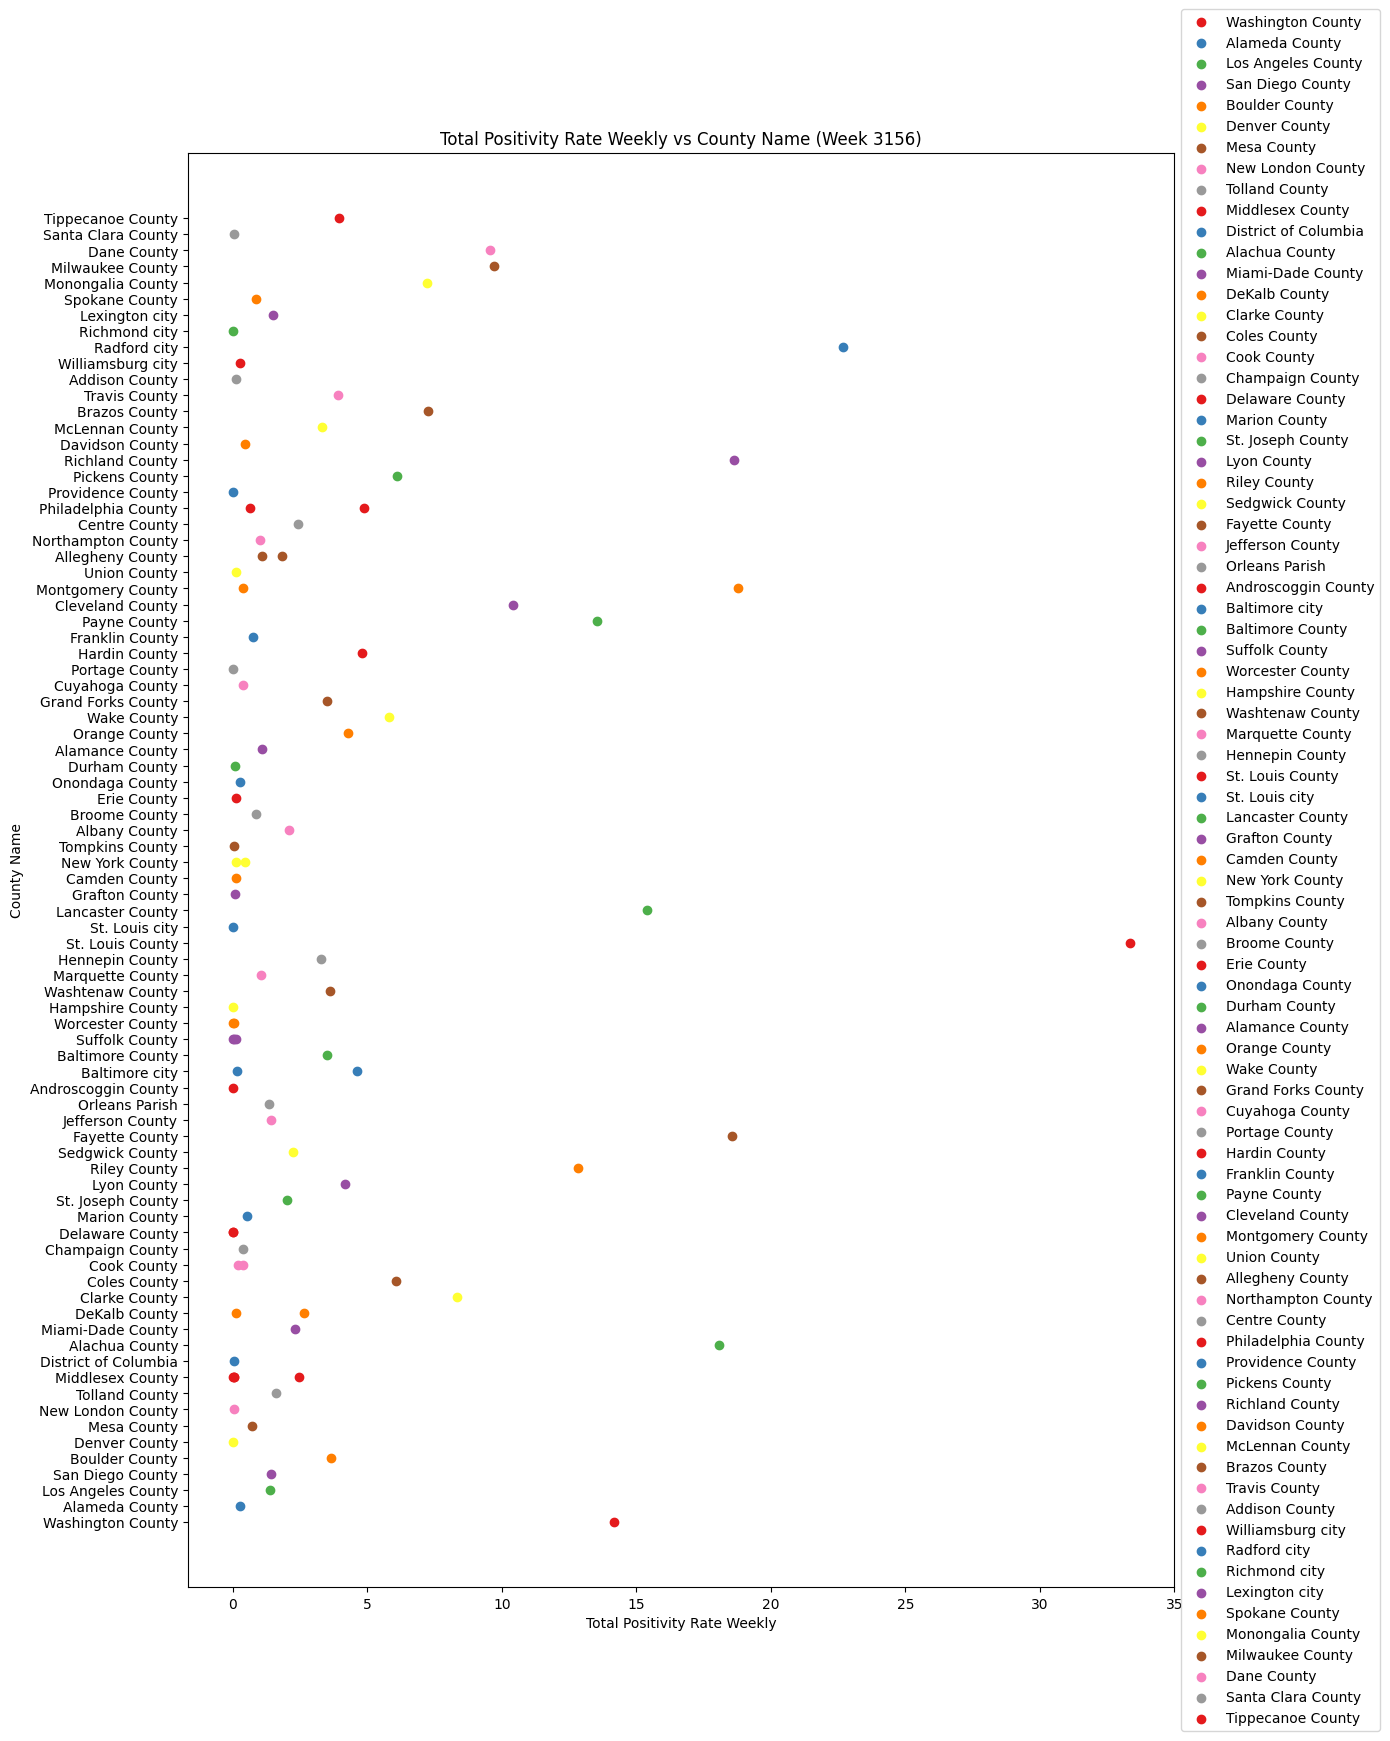

In [ ]:
# Select a specific week to visualize
selected_week = 3156

# Filter the data for the selected week
week_data = df[df['week'] == selected_week]

# Create a figure and axis
plt.figure(figsize=(14, 18))
ax = plt.gca()

# Use Seaborn color palette to automatically generate colors
county_palette = sns.color_palette("Set1", n_colors=len(week_data['county_name'].unique()))

# Plot TotalPositivityRateWeekly against county_name as a scatter plot
for i, county in enumerate(week_data['county_name'].unique()):
    county_data = week_data[week_data['county_name'] == county]
    ax.scatter(county_data['TotalPositivityRateWeekly'], [county] * len(county_data), color=county_palette[i], marker='o', label=county)

# Set labels and title
ax.set_xlabel('Total Positivity Rate Weekly')
ax.set_ylabel('County Name')
ax.set_title(f'Total Positivity Rate Weekly vs County Name (Week {selected_week})')

# Place the legend on the side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.tight_layout()
plt.show()

# **Observations:**
- The above graph represents the positivity rate for different counties for the 3156th week.
- It can be observed that the majority of counties had a positivity rate between 0 and 5 in the first week of the observations.

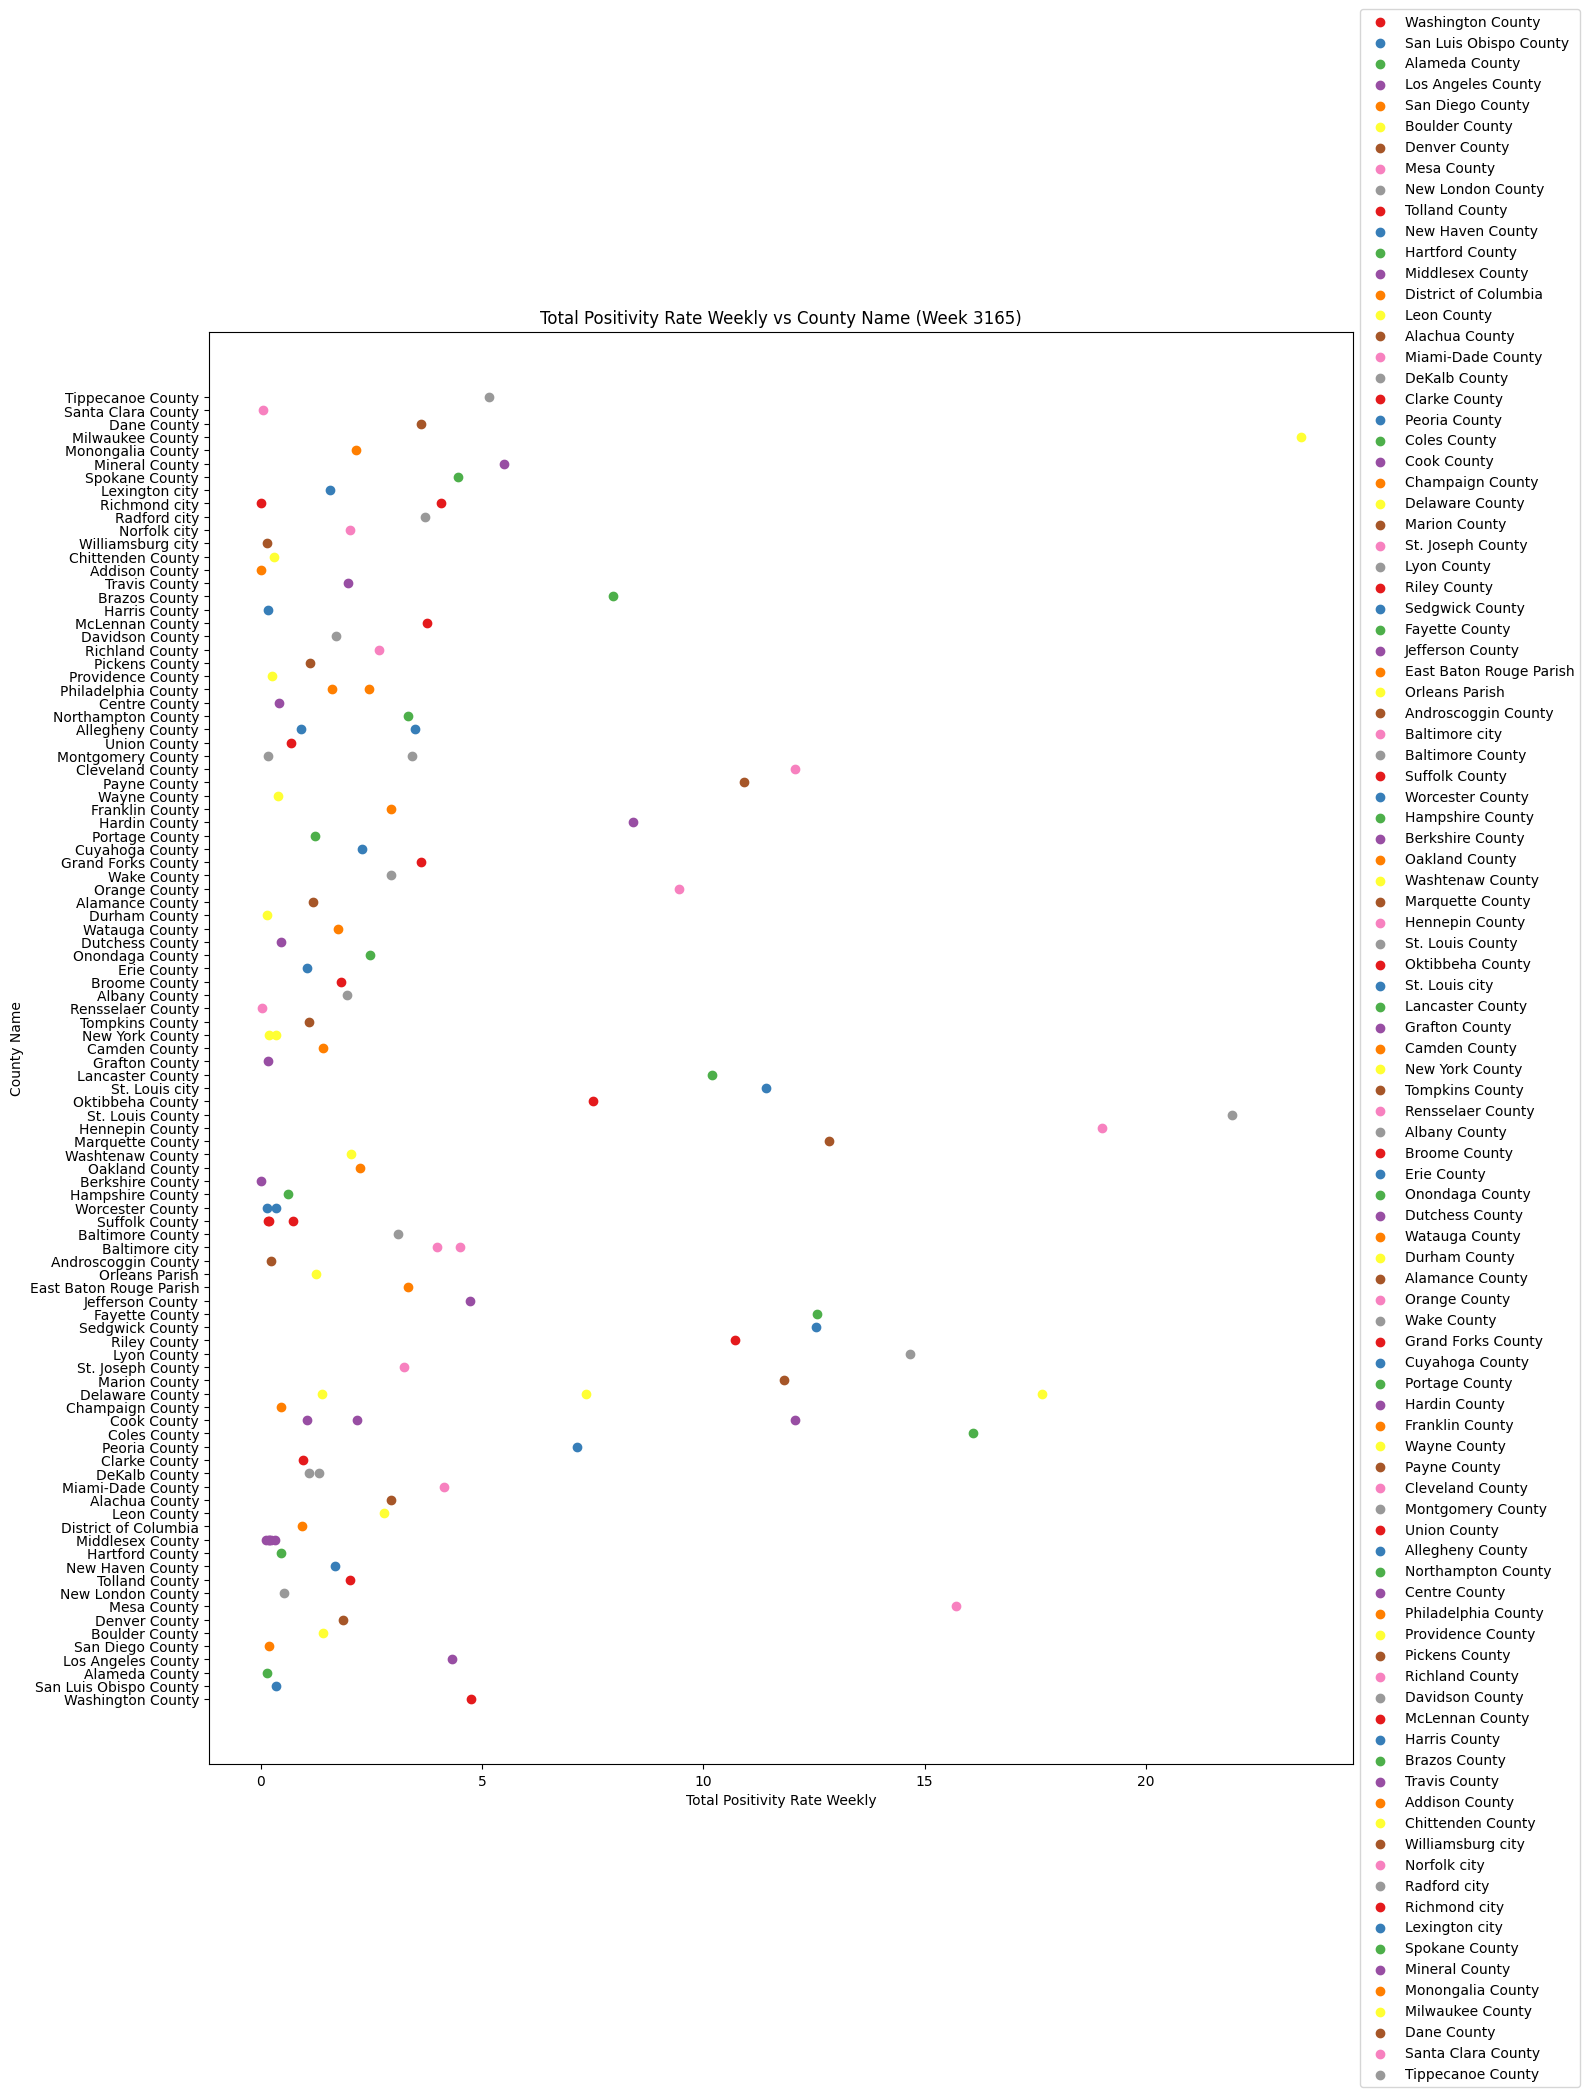

In [ ]:
# Select a specific week to visualize
selected_week = 3165

# Filter the data for the selected week
week_data = df[df['week'] == selected_week]

# Create a figure and axis
plt.figure(figsize=(16, 20))
ax = plt.gca()

# Use Seaborn color palette to automatically generate colors
county_palette = sns.color_palette("Set1", n_colors=len(week_data['county_name'].unique()))

# Plot TotalPositivityRateWeekly against county_name as a scatter plot
for i, county in enumerate(week_data['county_name'].unique()):
    county_data = week_data[week_data['county_name'] == county]
    ax.scatter(county_data['TotalPositivityRateWeekly'], [county] * len(county_data), color=county_palette[i], marker='o', label=county)

# Set labels and title
ax.set_xlabel('Total Positivity Rate Weekly')
ax.set_ylabel('County Name')
ax.set_title(f'Total Positivity Rate Weekly vs County Name (Week {selected_week})')

# Place the legend on the side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.tight_layout()
plt.show()

# **Observations:**
- The above graph represents the positivity rate for different counties for the 3165th week (the last week of observations).
- It can be seen that the positivity rate has significantly increased and now the majority of the counties have positivity rate between 5 and 10.

# **XG Boost**

In [ ]:
# Prepare X and Y
X = pd.get_dummies(df)
y = df['TotalPositivityRate']
X.drop(['TotalPositivityRate', 'number_students', 'week', 'FIPS'], inplace=True, axis=1)

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

ValueError: ignored

In [ ]:
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001)

In [ ]:
# Fit the Model
model.fit(scaled_X, y)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

# **Decision Tree**

In [ ]:
# Prepare X and Y
X = pd.get_dummies(df)
y = df['TotalPositivityRate']
X.drop(['TotalPositivityRate', 'number_students', 'week', 'FIPS'], inplace=True, axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the decision tree regressor
regressor = DecisionTreeRegressor(max_depth=5)  # You can adjust max_depth and other hyperparameters

In [ ]:
# Train the model
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
plt.figure(figsize=(10, 5))
plot_tree(regressor, filled=True, feature_names=X.columns)  # Replace X.columns with your feature names
plt.show()

# **Random Forest Regression**

In [ ]:
# Prepare X and Y
X = pd.get_dummies(df)
y = df['TotalPositivityRate']
X.drop(['TotalPositivityRate', 'number_students', 'week', 'FIPS'], inplace=True, axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

In [ ]:
y_pred = rf_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")